# **IMPORTING LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tldextract
from urllib.parse import urlparse , unquote
import re
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# **1.Loading the data**

In [4]:
df = pd.read_csv('malicious_phish.csv')
df

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


#  **2. Familiarizing with Data**

In [5]:
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [6]:
df.columns

Index(['url', 'type'], dtype='object')

In [7]:
df.shape

(651191, 2)

In [8]:
df.isnull().sum()

url     0
type    0
dtype: int64

In [9]:
type_counts = df['type'].value_counts()
type_counts

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

# **3. VISUALIZING THE DATA**

Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other

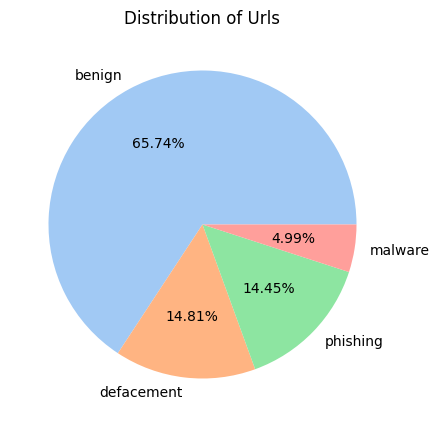

In [10]:
# Assuming you have type_counts as a pandas Series containing the count of each type
plt.figure(figsize=(5,5))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.2f%%', colors=sns.color_palette("pastel"))
plt.title('Distribution of Urls')
plt.show()

In [11]:
# Remove "www." from URLs and update the 'url' column
df['url'] = df['url'].str.replace('www.', '')
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://garage-pirenne.be/index.php?option=com_...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [12]:
# Create a dictionary to map types to categories
type_to_category = {
    "benign": 0,
    "defacement": 1,
    "phishing": 2,
    "malware": 3
}

# Add a new 'Category' column based on the 'type' column
df['Category'] = df['type'].map(type_to_category)

In [13]:
df.head()

,url,type,Category
0,br-icloud.com.br,phishing,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1


In [14]:
# Add a new 'URL_Length' column with the length of each URL
df['URL_Length'] = df['url'].apply(len)

In [15]:
df.shape

(651191, 4)

In [16]:
df.head()

,url,type,Category,URL_Length
0,br-icloud.com.br,phishing,2,16
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235


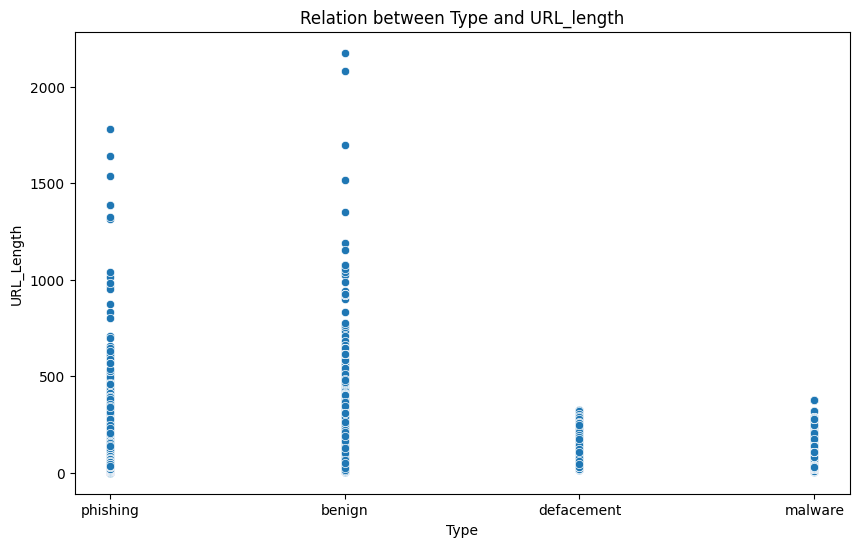

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='type' , y='URL_Length', )
plt.title('Relation between Type and URL_length')
plt.xlabel('Type')
plt.ylabel('URL_Length')
plt.show()

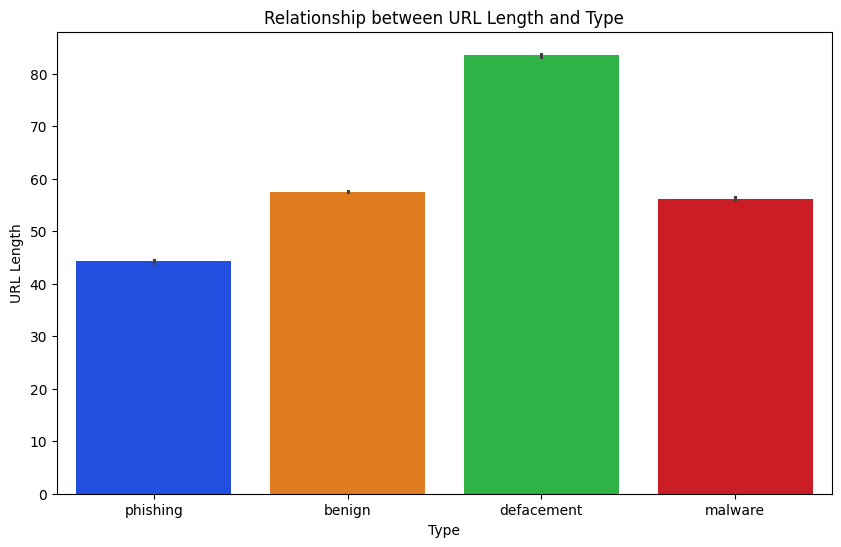

In [18]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='type', y='URL_Length',palette="bright")
plt.xlabel('Type')
plt.ylabel('URL Length')
plt.title("Relationship between URL Length and Type")
plt.show()

In [19]:
# Calculate the ratios for each URL type within the same type
df['type_ratio'] = df.groupby('type')['URL_Length'].transform(lambda x: x / x.sum() * 100)


In [20]:
df.shape

(651191, 5)

In [21]:
df.head()

,url,type,Category,URL_Length,type_ratio
0,br-icloud.com.br,phishing,2,16,0.000384
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0.000142
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0.000126
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0.001042
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0.002916


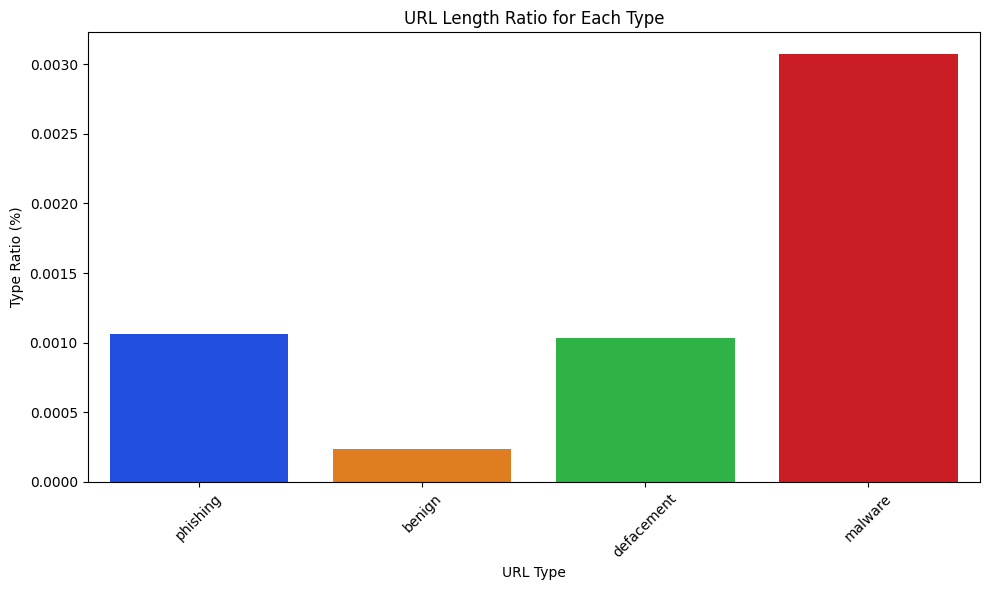

In [22]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='type', y='type_ratio', ci=None, palette='bright')
plt.title("URL Length Ratio for Each Type")
plt.ylabel("Type Ratio (%)")
plt.xlabel("URL Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
# Function to extract domain from URL using tldextract
def extract_domain(url):
    extracted = tldextract.extract(url)
    return f"{extracted.domain}.{extracted.suffix}"

# Add a new 'domain' column with the extracted domain from each URL
df['domain'] = df['url'].apply(extract_domain)

In [24]:
df.head()

,url,type,Category,URL_Length,type_ratio,domain
0,br-icloud.com.br,phishing,2,16,0.000384,br-icloud.com.br
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0.000142,mp3raid.com
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0.000126,bopsecrets.org
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0.001042,garage-pirenne.be
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0.002916,adventure-nicaragua.net


In [25]:
df.shape

(651191, 6)

In [26]:
# List of characters to count
characters_to_count = ['@', '?', '-', '=', '.', '#', '%', '+', '$', '!', '*', ',', '//']

# Function to count occurrences of a character in a URL
def count_character_occurrences(url, character):
    return url.count(character)

# Add new columns for each character and count occurrences
for character in characters_to_count:
    df[f'{character}'] = df['url'].apply(lambda url: count_character_occurrences(url, character))

In [27]:
df.head()

,url,type,Category,URL_Length,type_ratio,domain,@,?,-,=,.,#,%,+,$,!,*,",",//
0,br-icloud.com.br,phishing,2,16,0.000384,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0.000142,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0.000126,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0.001042,garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0.002916,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1


In [28]:
# Function to detect if there's a match between URL and host
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        return 1
    else:
        return 0

# Add a new 'Abnormal_URL' column with 1 if there's a match, 0 otherwise
df['Abnormal_URL'] = df['url'].apply(abnormal_url)

In [29]:
df.head()

,url,type,Category,URL_Length,type_ratio,domain,@,?,-,=,.,#,%,+,$,!,*,",",//,Abnormal_URL
0,br-icloud.com.br,phishing,2,16,0.000384,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0.000142,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0.000126,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0.001042,garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,0,1,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0.002916,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1,1


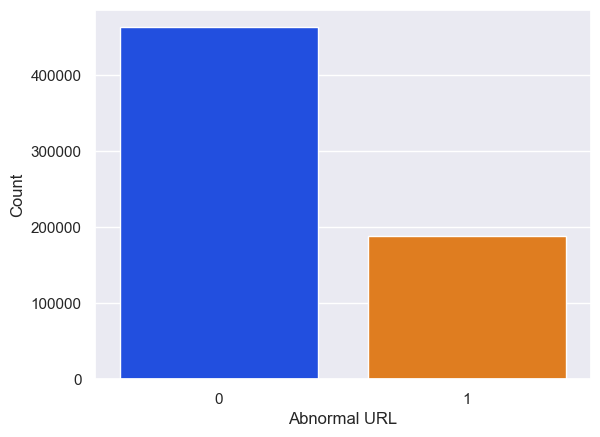

In [30]:
sns.set_theme(style="darkgrid")
sns.countplot(x='Abnormal_URL', data=df, palette="bright")
plt.xlabel('Abnormal URL')
plt.ylabel('Count')
plt.show()

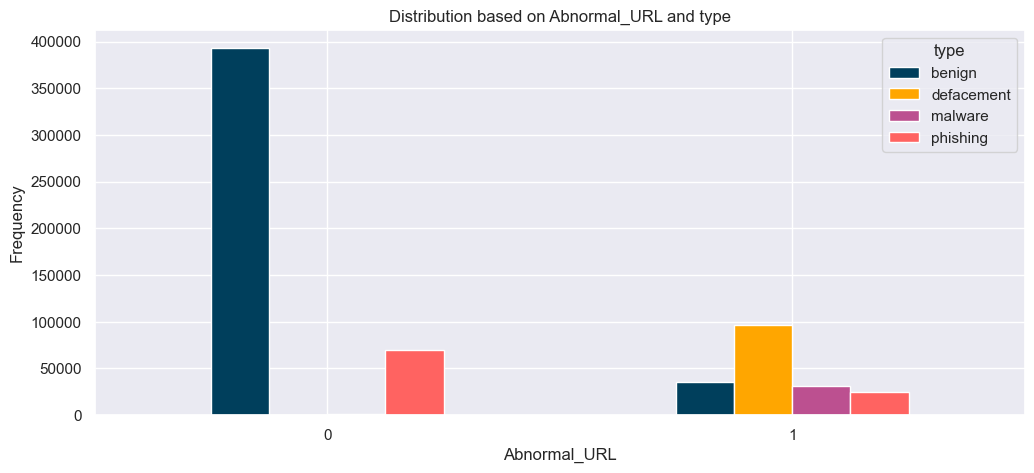

In [31]:
# Create a crosstab and plot the bar chart
pd.crosstab(df["Abnormal_URL"], df["type"]).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#bc5090','#ff6361'])
plt.title('Distribution based on Abnormal_URL and type')
plt.xlabel('Abnormal_URL')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.legend(title="type")
plt.show()

In [32]:
# Function to detect if the URL has "https"
def has_https(url):
    return int("https" in url)

# Add a new 'Has_HTTPS' column with 1 if there's "https", 0 otherwise
df['Has_HTTPS'] = df['url'].apply(has_https)
df.head()

,url,type,Category,URL_Length,type_ratio,domain,@,?,-,=,...,#,%,+,$,!,*,",",//,Abnormal_URL,Has_HTTPS
0,br-icloud.com.br,phishing,2,16,0.000384,br-icloud.com.br,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0.000142,mp3raid.com,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0.000126,bopsecrets.org,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0.001042,garage-pirenne.be,0,1,1,4,...,0,0,0,0,0,0,0,1,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0.002916,adventure-nicaragua.net,0,1,1,3,...,0,0,0,0,0,0,0,1,1,0


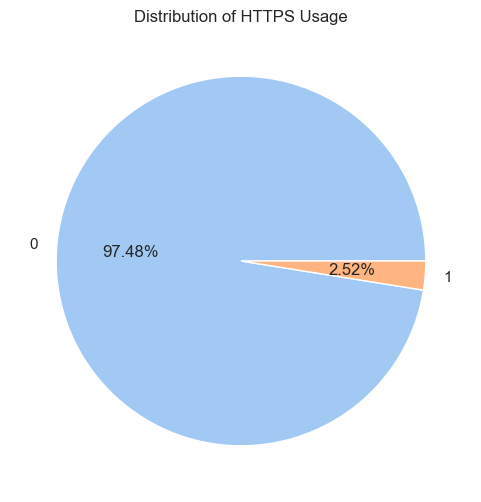

In [33]:
# Count the occurrences of each value in the "Has_HTTPS" column
https_counts = df['Has_HTTPS'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(https_counts, labels=https_counts.index, autopct='%1.2f%%', colors=sns.color_palette("pastel"))
plt.title('Distribution of HTTPS Usage')
plt.show()

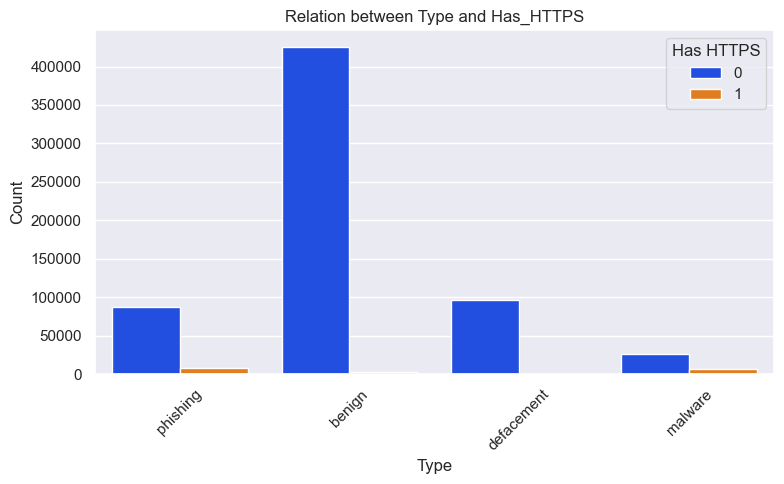

In [34]:
# Create a bar plot using Seaborn
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='type', hue='Has_HTTPS',palette="bright")
plt.title("Relation between Type and Has_HTTPS")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Has HTTPS")
plt.tight_layout()
plt.show()

In [35]:
df.head()

,url,type,Category,URL_Length,type_ratio,domain,@,?,-,=,...,#,%,+,$,!,*,",",//,Abnormal_URL,Has_HTTPS
0,br-icloud.com.br,phishing,2,16,0.000384,br-icloud.com.br,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0.000142,mp3raid.com,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0.000126,bopsecrets.org,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0.001042,garage-pirenne.be,0,1,1,4,...,0,0,0,0,0,0,0,1,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0.002916,adventure-nicaragua.net,0,1,1,3,...,0,0,0,0,0,0,0,1,1,0


In [36]:
# Function to count the number of digits in a string
def count_digits(string):
    return sum(1 for char in string if char.isdigit())

# Function to count the number of letters in a string
def count_letters(string):
    return sum(1 for char in string if char.isalpha())

# Add new columns for digit and letter counts
df['Digit_Count'] = df['url'].apply(count_digits)
df['Letter_Count'] = df['url'].apply(count_letters)
df.head()

,url,type,Category,URL_Length,type_ratio,domain,@,?,-,=,...,+,$,!,*,",",//,Abnormal_URL,Has_HTTPS,Digit_Count,Letter_Count
0,br-icloud.com.br,phishing,2,16,0.000384,br-icloud.com.br,0,0,1,0,...,0,0,0,0,0,0,0,0,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0.000142,mp3raid.com,0,0,0,0,...,0,0,0,0,0,0,0,0,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0.000126,bopsecrets.org,0,0,0,0,...,0,0,0,0,0,0,0,0,1,25
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0.001042,garage-pirenne.be,0,1,1,4,...,0,0,0,0,0,1,1,0,7,60
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0.002916,adventure-nicaragua.net,0,1,1,3,...,0,0,0,0,0,1,1,0,22,199


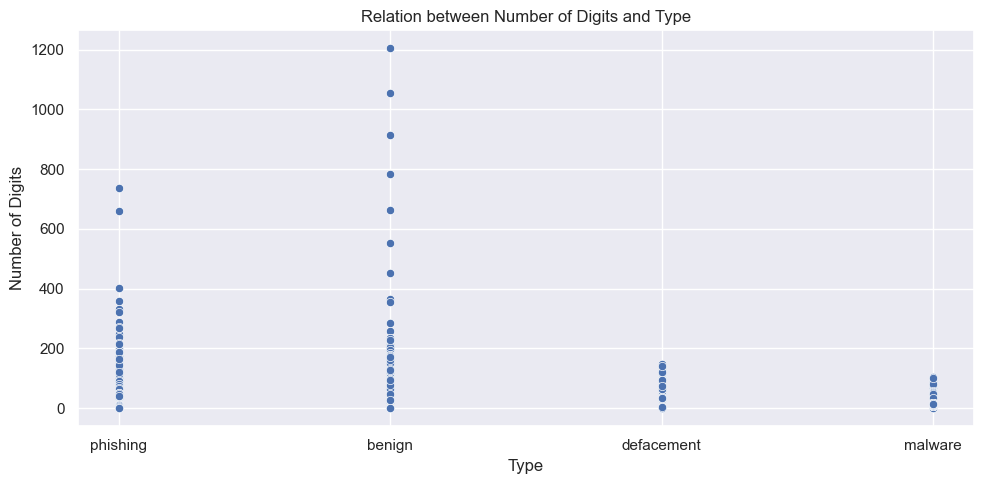

In [37]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='type', y='Digit_Count')
plt.title("Relation between Number of Digits and Type")
plt.xlabel("Type")
plt.ylabel("Number of Digits")
plt.tight_layout()
plt.show()

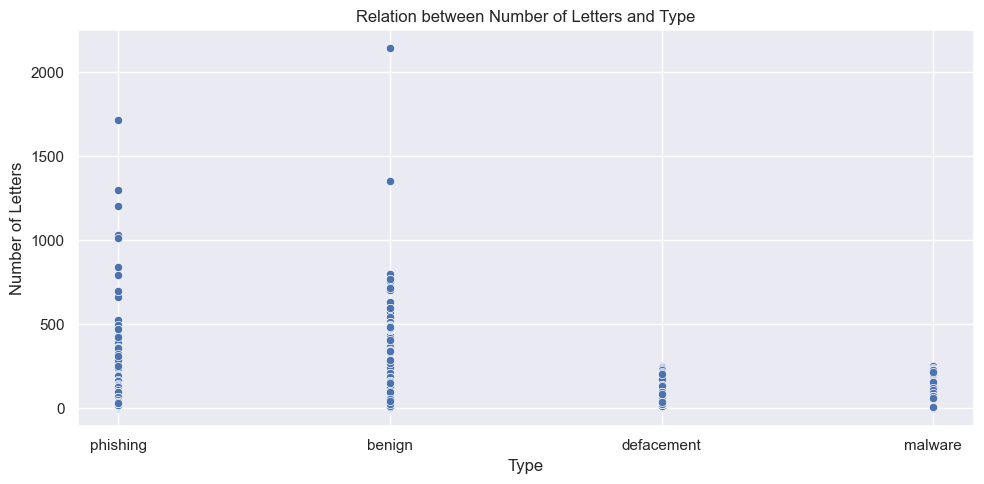

In [38]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='type', y='Letter_Count')
plt.title("Relation between Number of Letters and Type")
plt.xlabel("Type")
plt.ylabel("Number of Letters")
plt.tight_layout()
plt.show()

In [39]:
# Define the function to check text encoding
def check_text_encoding(url):
    # Parse the URL
    parsed_url = urlparse(url)

    # Extract the text part
    text_part = parsed_url.path

    # Check for encoding
    decoded_text = unquote(text_part)

    # Check if the decoded text matches the original text
    if decoded_text == text_part:
        return 0  # No encoding found
    else:
        return 1  # Encoding found

# Apply the function to the 'url' column and create a new column 'Has_Text_Encoding'
df['Has_Text_Encoding'] = df['url'].apply(check_text_encoding)
df.head()

,url,type,Category,URL_Length,type_ratio,domain,@,?,-,=,...,$,!,*,",",//,Abnormal_URL,Has_HTTPS,Digit_Count,Letter_Count,Has_Text_Encoding
0,br-icloud.com.br,phishing,2,16,0.000384,br-icloud.com.br,0,0,1,0,...,0,0,0,0,0,0,0,0,13,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0.000142,mp3raid.com,0,0,0,0,...,0,0,0,0,0,0,0,1,29,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0.000126,bopsecrets.org,0,0,0,0,...,0,0,0,0,0,0,0,1,25,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0.001042,garage-pirenne.be,0,1,1,4,...,0,0,0,0,1,1,0,7,60,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0.002916,adventure-nicaragua.net,0,1,1,3,...,0,0,0,0,1,1,0,22,199,0


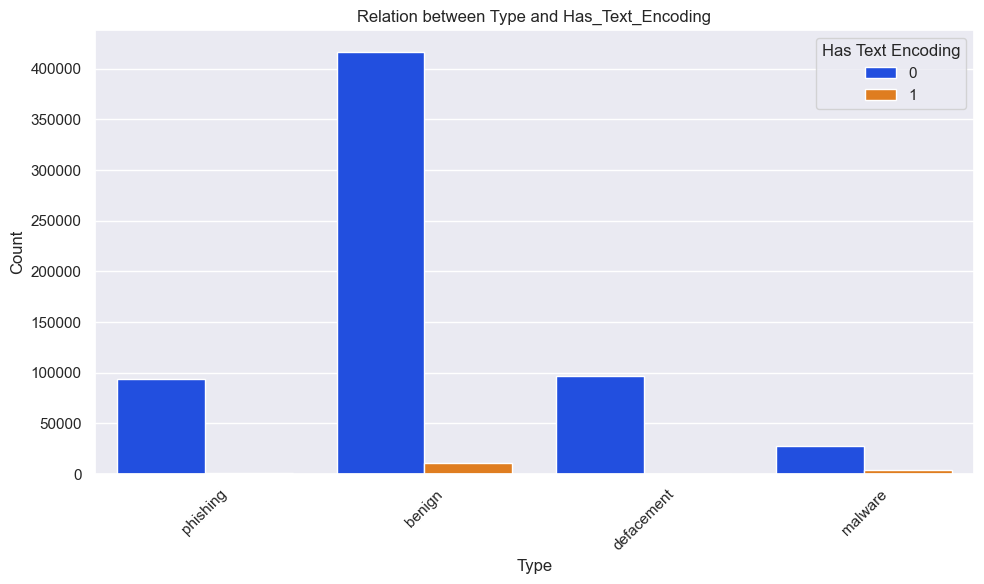

In [40]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', hue='Has_Text_Encoding',palette='bright')
plt.title("Relation between Type and Has_Text_Encoding")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Has Text Encoding")
plt.tight_layout()
plt.show()

In [41]:
df.isnull().sum()

url                  0
type                 0
Category             0
URL_Length           0
type_ratio           0
domain               0
@                    0
?                    0
-                    0
=                    0
.                    0
#                    0
%                    0
+                    0
$                    0
!                    0
*                    0
,                    0
//                   0
Abnormal_URL         0
Has_HTTPS            0
Digit_Count          0
Letter_Count         0
Has_Text_Encoding    0
dtype: int64

In [42]:
X = df.drop(['url','type','Category','domain','type_ratio','*'],axis=1)
y = df['Category']

# Splitting the Data

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (520952, 18)
X_test shape: (130239, 18)
y_train shape: (520952,)
y_test shape: (130239,)


# Training the Data

In [44]:
# Initialize and train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_train_log = logistic_model.predict(X_train)
y_test_log = logistic_model.predict(X_test)


In [45]:
# Calculate the accuracy of the model
acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test, y_test_log)
print("Logistic Regression :")
print("Logistic Regression : Accuracy on train Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))

Logistic Regression :
Logistic Regression : Accuracy on train Data: 0.822
Logistic Regression : Accuracy on test Data: 0.822


In [46]:
rf_model_classifier = RandomForestClassifier(random_state=42)
rf_model_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_train_rf = rf_model_classifier.predict(X_train)
y_test_rf = rf_model_classifier.predict(X_test)


In [47]:
# Calculate the accuracy of the model
acc_train_rf = metrics.accuracy_score(y_train,y_train_rf)
acc_test_rf = metrics.accuracy_score(y_test, y_test_rf)
print("Random Forest Classifier :")
print("Random Forest Classifier : Accuracy on train Data: {:.3f}".format(acc_train_rf))
print("Random Forest Classifier : Accuracy on test Data: {:.3f}".format(acc_test_rf))

Random Forest Classifier :
Random Forest Classifier : Accuracy on train Data: 0.934
Random Forest Classifier : Accuracy on test Data: 0.914


In [49]:
import joblib
joblib.dump(rf_model_classifier, 'phishing_model.pkl')


['phishing_model.pkl']